In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier

In [12]:
test = pd.read_csv('test.csv')
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [13]:
df =  pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


- battery_power - Total energy a battery can store in one time measured in mAh
- blue -          Has bluetooth or not
- clock_speed -   speed at which microprocessor executes instructions
- dual_sim -      Has dual sim support or not
- fc        -     Front Camera mega pixels
- four_g     -    Has 4G or not
- int_memory  -   Internal Memory in Gigabytes
- m_dep        -  Mobile Depth in cm
- mobile_wt -     Weight of mobile phone 
- n_cores -       Number of cores of processor
- pc      -       Primary Camera mega pixels
- px_height  -    Pixel Resolution Height
- px_width -      Pixel Resolution Width
- ram       -     Random Access Memory in Megabytes
- sc_h  -         Screen Height of mobile in cm
- sc_w    -       Screen Width of mobile in cm
- talk_time  -    longest time that a single battery charge will last when you are
- three_g   -     Has 3G or not
- touch_screen -  Has touch screen or not
- wifi       -    Has wifi or not 
- price_range  -  This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

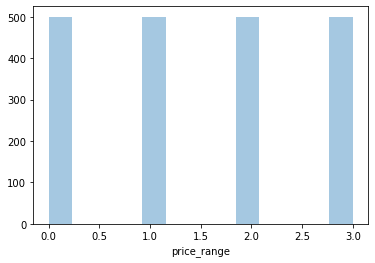

In [6]:
sns.distplot(df['price_range'],kde= False)

As we can see so far all the data is non-null, and the distribution of our target feature is uniform.

now i would like to check the corroleatoin between each feature to the target.

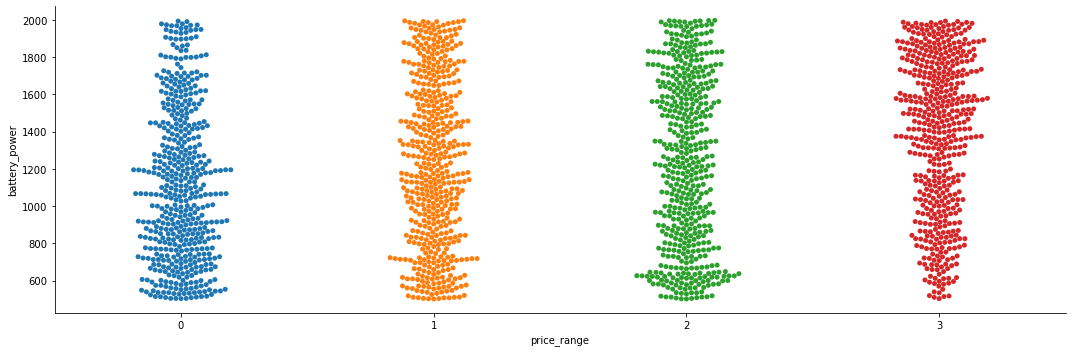

In [7]:
sns.catplot(data=df,x='price_range',y='battery_power',kind='swarm',aspect=3)

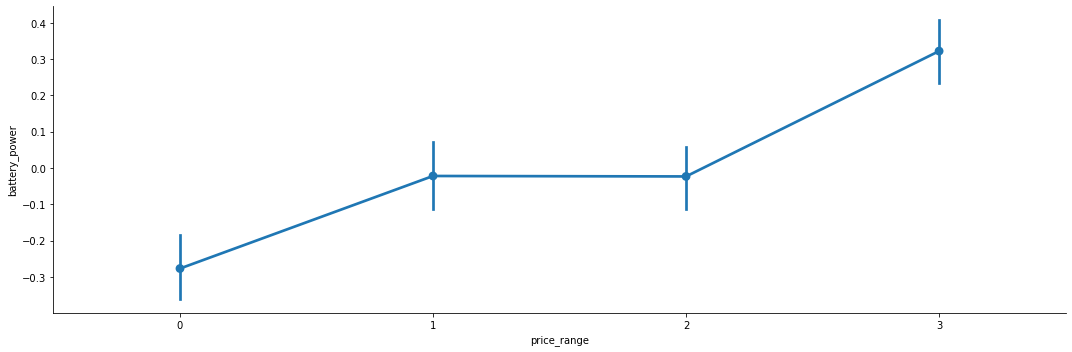

In [35]:
sns.catplot(data=df,x='price_range',y='battery_power',kind='point',aspect=3)

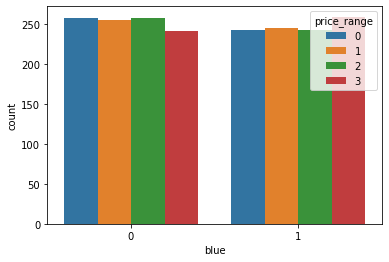

In [11]:
sns.countplot(df['blue'],hue=df['price_range'])

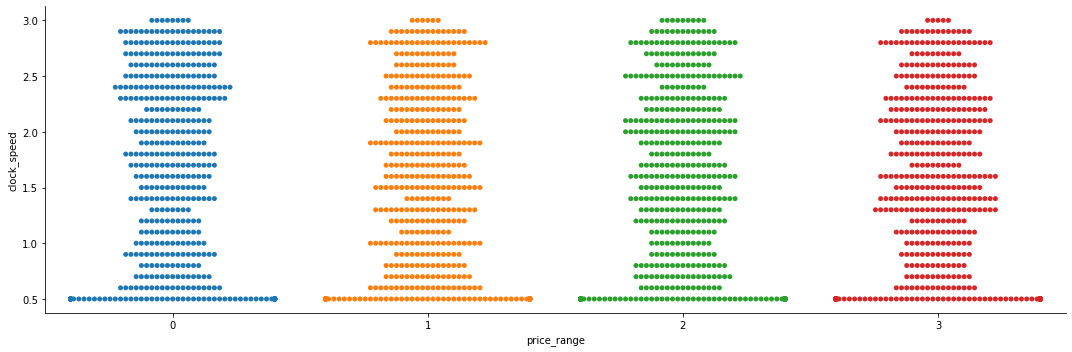

In [12]:
sns.catplot(data=df,x='price_range',y='clock_speed',kind='swarm',aspect=3)

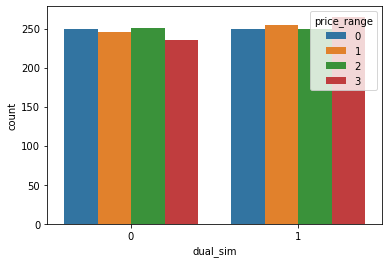

In [13]:
sns.countplot(df['dual_sim'],hue=df['price_range'])

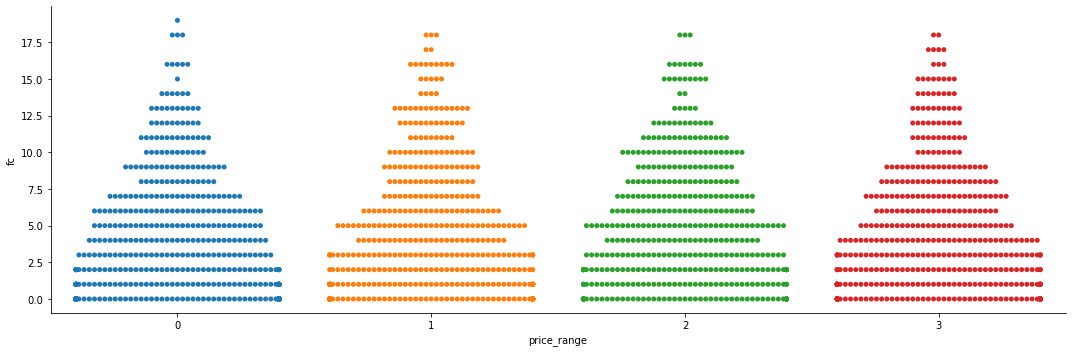

In [14]:
sns.catplot(data=df,x='price_range',y='fc',kind='swarm',aspect=3)

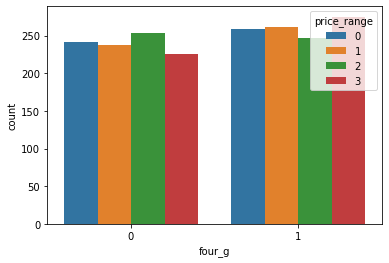

In [15]:
sns.countplot(df['four_g'],hue=df['price_range'])

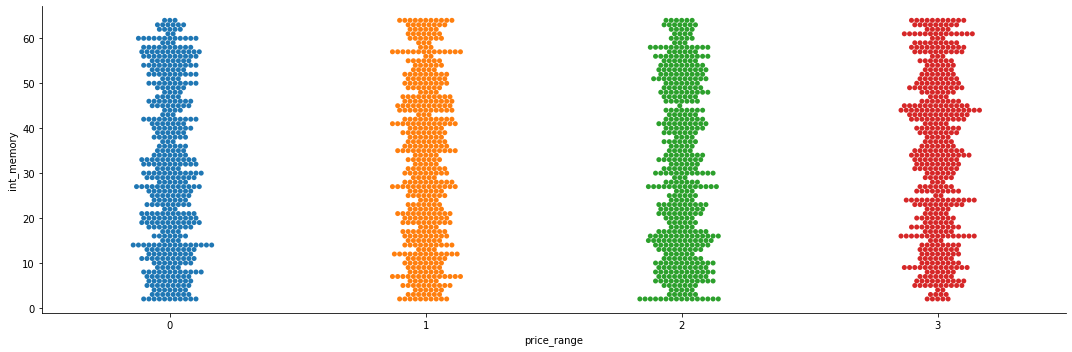

In [16]:
sns.catplot(data=df,x='price_range',y='int_memory',kind='swarm',aspect=3)

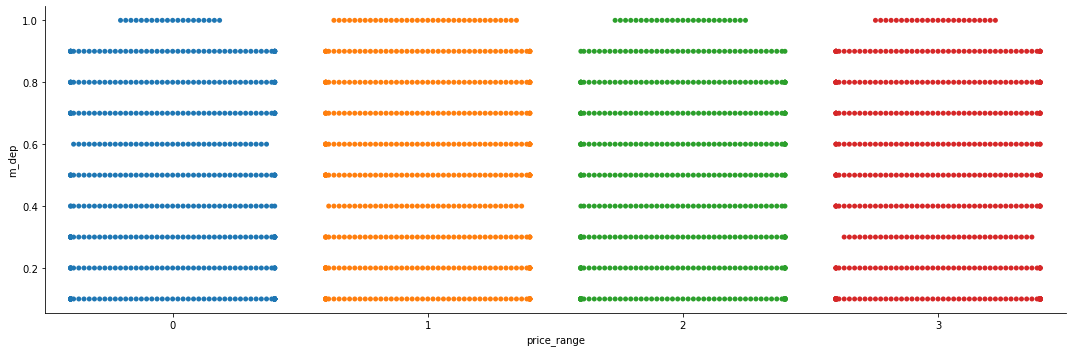

In [17]:
sns.catplot(data=df,x='price_range',y='m_dep',kind='swarm',aspect=3)

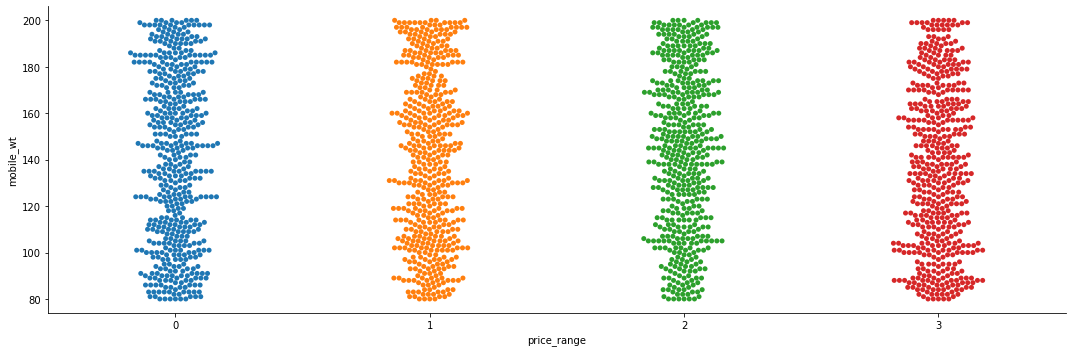

In [18]:
sns.catplot(data=df,x='price_range',y='mobile_wt',kind='swarm',aspect=3)

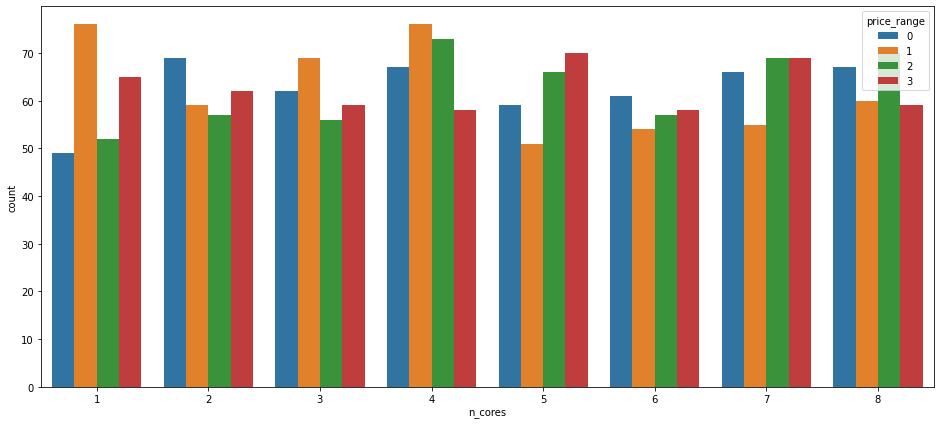

In [19]:
plt.figure(figsize=(16,7))
sns.countplot(df['n_cores'],hue=df['price_range'])


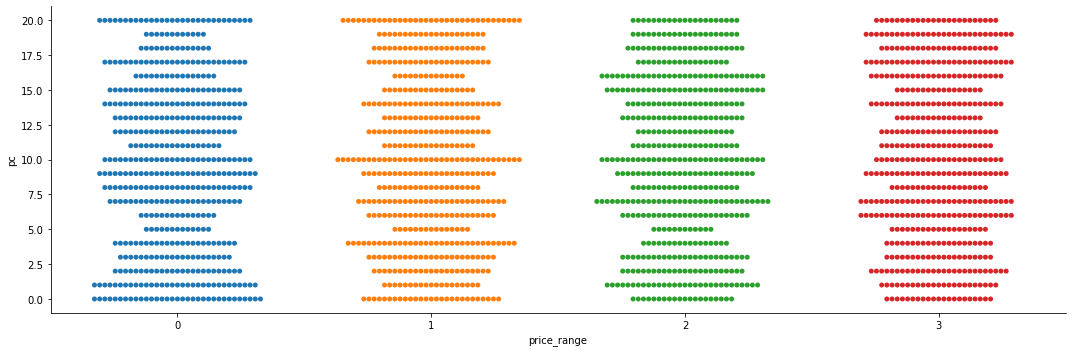

In [20]:
sns.catplot(data=df,x='price_range',y='pc',kind='swarm',aspect=3)

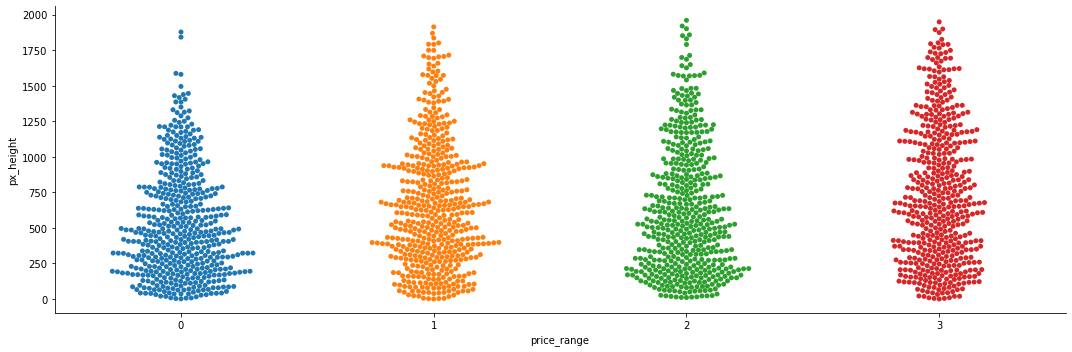

In [21]:
sns.catplot(data=df,x='price_range',y='px_height',kind='swarm',aspect=3)

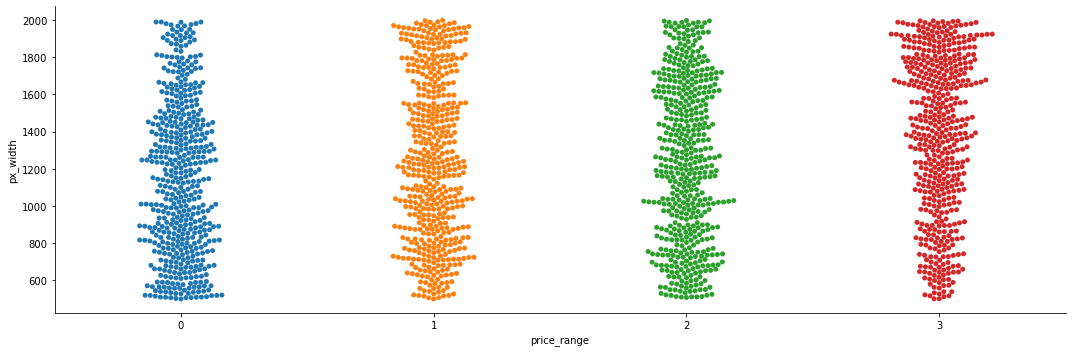

In [22]:
sns.catplot(data=df,x='price_range',y='px_width',kind='swarm',aspect=3)

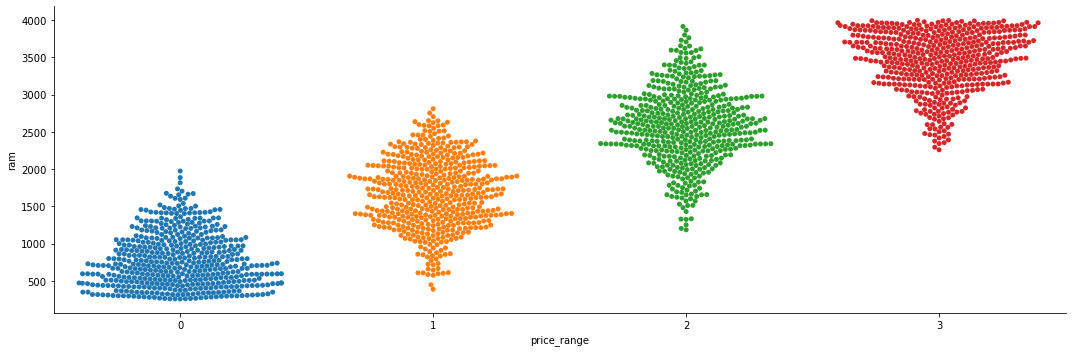

In [23]:
sns.catplot(data=df,x='price_range',y='ram',kind='swarm',aspect=3)

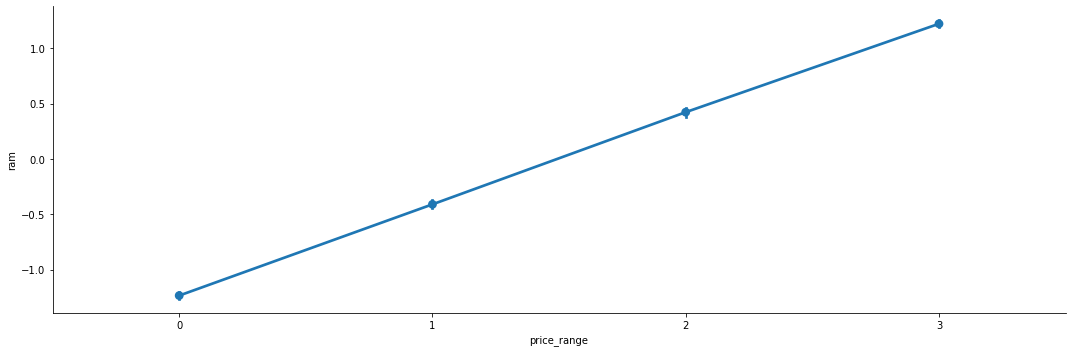

In [34]:
sns.catplot(data=df,x='price_range',y='ram',kind='point',aspect=3)

So far this is the most important feature.

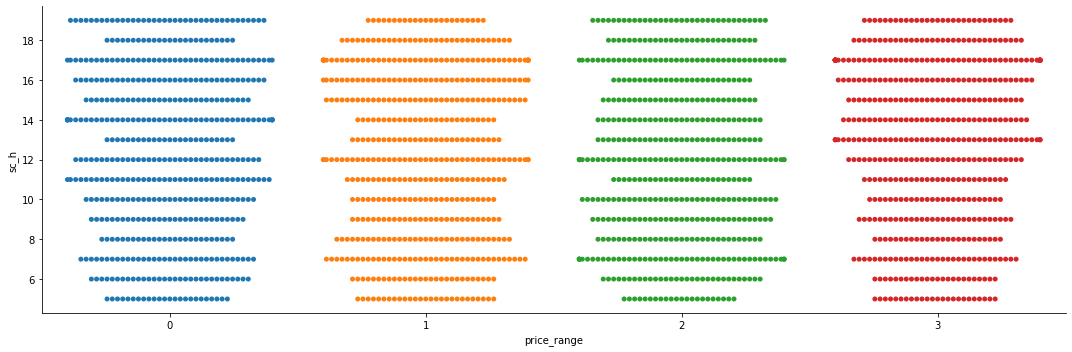

In [24]:
sns.catplot(data=df,x='price_range',y='sc_h',kind='swarm',aspect=3)

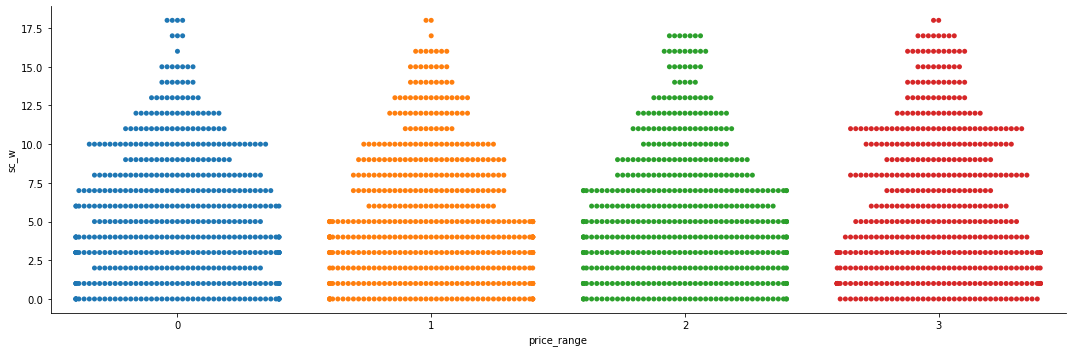

In [25]:
sns.catplot(data=df,x='price_range',y='sc_w',kind='swarm',aspect=3)

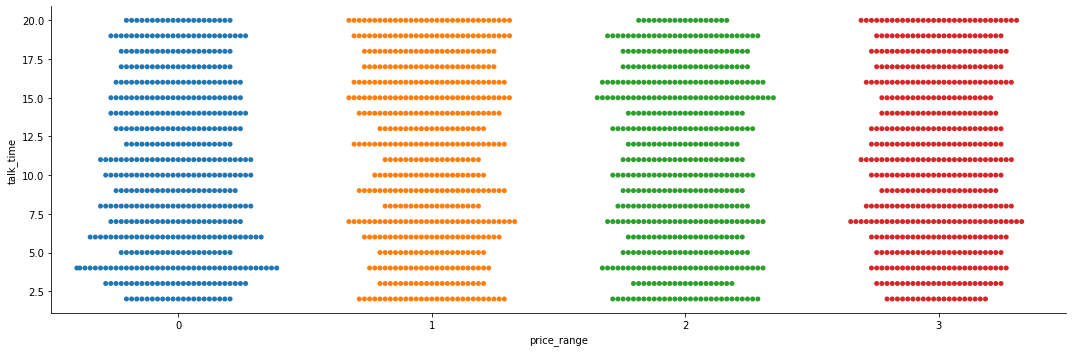

In [26]:
sns.catplot(data=df,x='price_range',y='talk_time',kind='swarm',aspect=3)

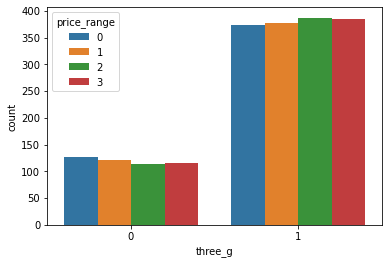

In [27]:
sns.countplot(df['three_g'],hue=df['price_range'])

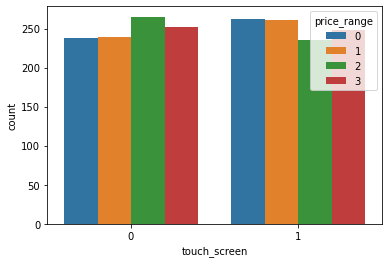

In [28]:
sns.countplot(df['touch_screen'],hue=df['price_range'])

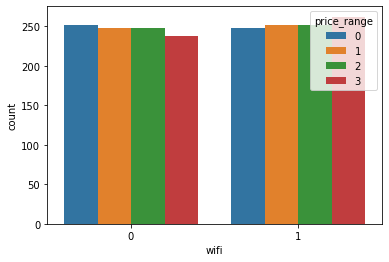

In [29]:
sns.countplot(df['wifi'],hue=df['price_range'])


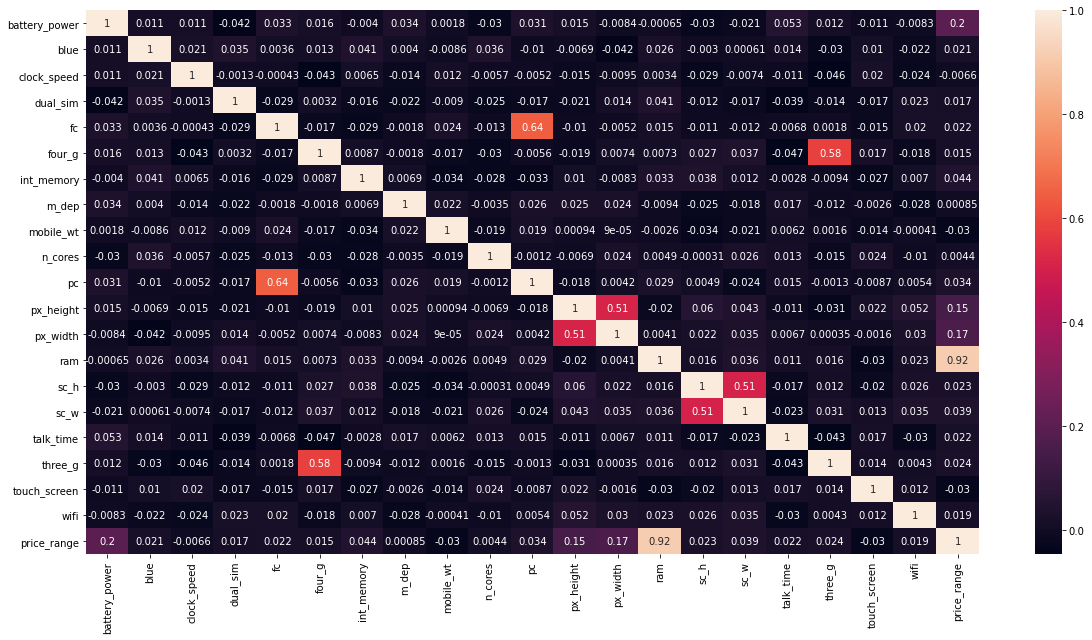

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

to summary this part we can see that the most important feature is ram.

## KNN

At first lets split the data and make a simple knn model

In [193]:
target=df['price_range']
data=df.drop(['price_range'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0)

In [194]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [195]:
y_pred = knn.predict(X_test)

In [196]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.92      0.90      0.91       110
           2       0.91      0.86      0.89       125
           3       0.92      0.95      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



the results are pretty good lets use grid search to find the best k and weight for the model

In [197]:
k_range = list(range(3,51))
weghit_op = ['uniform','distance']
d= {'n_neighbors' :k_range,'weights': weghit_op}

In [198]:
grid = GridSearchCV(knn,d,cv=10,scoring='accuracy')
grid.fit(data,target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [199]:
grid.best_score_

0.9380000000000001

In [200]:
grid.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [201]:
knn = KNeighborsClassifier(n_neighbors = 20, weights = 'distance')
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [202]:
y_pred = knn.predict(X_test)

In [203]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       0.95      0.95      0.95       110
           2       0.93      0.90      0.91       125
           3       0.94      0.96      0.95       141

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



Text(33.0, 0.5, 'Actual')

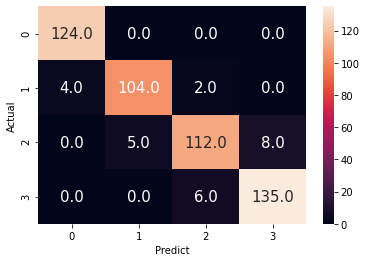

In [204]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

## Decision Tree

At first we will make a simple Decision Tree.

In [222]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
dtc

DecisionTreeClassifier()

In [223]:
y_pred = dtc.predict(X_test)

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       124
           1       0.75      0.78      0.77       110
           2       0.72      0.71      0.72       125
           3       0.86      0.87      0.87       141

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



Now to improve it we will use cost complexity pruning to find the tree with the lowest score.

the equation for tree score is:
$$Tree Score=gini+\alpha T$$
- T - Number of leafs of the tree
- gini - the metric that evaluate the tree
- $\alpha$ - the tuning parameter we want to find

In [225]:
path = dtc.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas

In [226]:
d={'ccp_alpha':alphas}

In [227]:
grid = GridSearchCV(dtc,d, cv=10,scoring='accuracy')
grid.fit(data,target)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00044202, 0.00044244, 0.00061111, 0.00061111,
       0.00061905, 0.00062222, 0.000625  , 0.00064368, 0.00064368,
       0.00064444, 0.00064444, 0.00064583, 0.00065306, 0.00065333,
       0.00065359, 0.00065418, 0.00065597, 0.00065818, 0.00065854,
       0.00086741, 0.00088889, 0.00088889, 0.00088889, 0.00088889,...
       0.00232555, 0.00235341, 0.00237037, 0.00239099, 0.00268889,
       0.00270026, 0.00272142, 0.00277778, 0.00321111, 0.0032138 ,
       0.00327099, 0.0035091 , 0.0037037 , 0.00380918, 0.00422357,
       0.00471392, 0.00604863, 0.00614371, 0.00651787, 0.00656508,
       0.00672879, 0.00725926, 0.00835336, 0.00860215, 0.00926264,
       0.0101045 , 0.01052856, 0.01196518, 0.01237427, 0.02005826,
       0.08798466, 0.10955535, 0.18093516])},
             scoring='accuracy')

In [228]:
grid.best_score_

0.859

In [229]:
grid.best_params_

{'ccp_alpha': 0.00132487922705314}

In [230]:
dtc = DecisionTreeClassifier(ccp_alpha = 0.00132487922705314)
dtc = dtc.fit(X_train,y_train)
dtc

DecisionTreeClassifier(ccp_alpha=0.00132487922705314)

In [231]:
y_pred = dtc.predict(X_test)

In [232]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       124
           1       0.78      0.73      0.75       110
           2       0.70      0.72      0.71       125
           3       0.84      0.87      0.85       141

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



Text(33.0, 0.5, 'Actual')

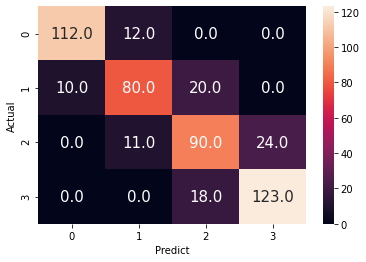

In [233]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

[Text(414.84375, 387.315, 'X[13] <= 2235.5\ngini = 0.75\nsamples = 1500\nvalue = [376, 390, 375, 359]'),
 Text(166.21875, 346.545, 'X[13] <= 1103.0\ngini = 0.582\nsamples = 798\nvalue = [376, 345, 77, 0]'),
 Text(78.75, 305.775, 'X[11] <= 1449.0\ngini = 0.208\nsamples = 340\nvalue = [300, 40, 0, 0]'),
 Text(49.5, 265.005, 'X[0] <= 1816.5\ngini = 0.154\nsamples = 322\nvalue = [295, 27, 0, 0]'),
 Text(18.0, 224.235, 'X[11] <= 1077.5\ngini = 0.092\nsamples = 289\nvalue = [275, 14, 0, 0]'),
 Text(9.0, 183.465, 'gini = 0.032\nsamples = 244\nvalue = [240, 4, 0, 0]'),
 Text(27.0, 183.465, 'X[0] <= 1268.5\ngini = 0.346\nsamples = 45\nvalue = [35, 10, 0, 0]'),
 Text(18.0, 142.695, 'gini = 0.064\nsamples = 30\nvalue = [29, 1, 0, 0]'),
 Text(36.0, 142.695, 'X[13] <= 802.0\ngini = 0.48\nsamples = 15\nvalue = [6, 9, 0, 0]'),
 Text(27.0, 101.92500000000001, 'X[10] <= 7.0\ngini = 0.444\nsamples = 9\nvalue = [6, 3, 0, 0]'),
 Text(18.0, 61.15500000000003, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]'

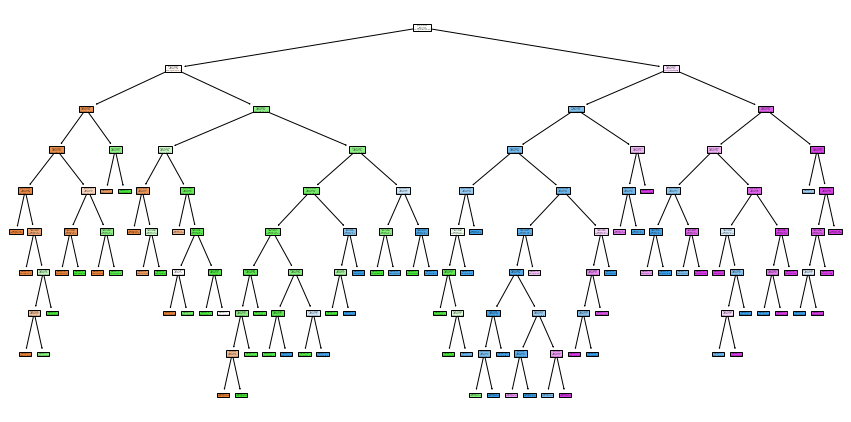

In [234]:
plt.figure(figsize=(15,7.5))
plot_tree(dtc,filled=True)

# Scalling The Data

Now lets try to improve our results by normalizing the data

In [235]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
ss = StandardScaler()
df[features] = ss.fit_transform(df[features])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1


In [244]:
target=df['price_range']
data=df.drop(['price_range'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(data,target, random_state=0)

At first lets eaxmin again the knn model.

In [245]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [246]:
y_pred = knn.predict(X_test)

In [247]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       124
           1       0.36      0.46      0.41       110
           2       0.38      0.41      0.39       125
           3       0.76      0.47      0.58       141

    accuracy                           0.51       500
   macro avg       0.53      0.51      0.51       500
weighted avg       0.54      0.51      0.51       500



we can see that we have much worse results. lets try to improve it using grid search.

In [248]:
k_range = list(range(3,51))
weghit_op = ['uniform','distance']
d= {'n_neighbors' :k_range,'weights': weghit_op}

In [249]:
grid = GridSearchCV(knn,d,cv=10,scoring='accuracy')
grid.fit(data,target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [250]:
grid.best_score_

0.6535

In [251]:
grid.best_params_

{'n_neighbors': 45, 'weights': 'distance'}

The results are stil very bad.

lets examine the Decision Tree model.

In [252]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
dtc

DecisionTreeClassifier()

In [253]:
y_pred = dtc.predict(X_test)

In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       124
           1       0.74      0.79      0.76       110
           2       0.72      0.70      0.71       125
           3       0.86      0.88      0.87       141

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



the simple model is slightly worse than the original, lets prune it.

In [255]:
path = dtc.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas

In [256]:
d={'ccp_alpha':alphas}

In [257]:
grid = GridSearchCV(dtc,d, cv=10,scoring='accuracy')
grid.fit(data,target)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00044202, 0.00044244, 0.00061111, 0.00061111,
       0.00061905, 0.00062222, 0.000625  , 0.00064368, 0.00064368,
       0.00064444, 0.00064444, 0.00064583, 0.00065306, 0.00065333,
       0.00065359, 0.00065418, 0.00065597, 0.00065818, 0.00065854,
       0.00086741, 0.00088889, 0.00088889, 0.00088889, 0.00088889,...
       0.00232555, 0.00235341, 0.00237037, 0.00239099, 0.00268889,
       0.00270026, 0.00272142, 0.00277778, 0.00321111, 0.0032138 ,
       0.00327099, 0.0035091 , 0.0037037 , 0.00380918, 0.00422357,
       0.00471392, 0.00604863, 0.00614371, 0.00651787, 0.00656508,
       0.00672879, 0.00725926, 0.00835336, 0.00860215, 0.00926264,
       0.0101045 , 0.01052856, 0.01196518, 0.01237427, 0.02005826,
       0.08798466, 0.10955535, 0.18093516])},
             scoring='accuracy')

In [258]:
grid.best_score_

0.8565000000000002

In [259]:
grid.best_params_

{'ccp_alpha': 0.0013307142857142853}

the result is not as good as before.

## Dummy Classifier 

Beacaus the target classes distribution is uniform so we will choose the strategy 'uniform' for the dummy model.

In [260]:
dm = DummyClassifier(strategy='uniform')
dm.fit(X_train,y_train)
dm

DummyClassifier(strategy='uniform')

In [261]:
y_pred = dm.predict(X_test)

In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.24      0.25       124
           1       0.15      0.16      0.16       110
           2       0.21      0.22      0.22       125
           3       0.23      0.22      0.23       141

    accuracy                           0.21       500
   macro avg       0.21      0.21      0.21       500
weighted avg       0.21      0.21      0.21       500



Text(33.0, 0.5, 'Actual')

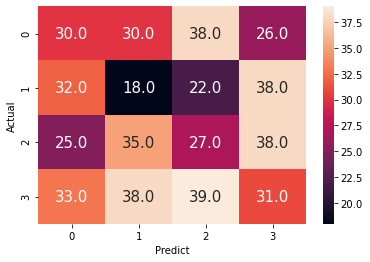

In [263]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

our models are much better than the dummy model. 

lets try to create a model using just the 'ram' feature.

In [14]:
target=df['price_range']
data=df[['ram']]
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0)

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       124
           1       0.59      0.66      0.63       110
           2       0.61      0.58      0.59       125
           3       0.85      0.81      0.83       141

    accuracy                           0.73       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.74      0.73      0.74       500



Text(33.0, 0.5, 'Actual')

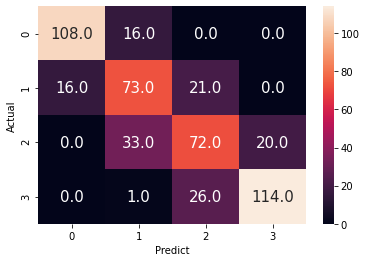

In [18]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

We can see that simple knn model with just the 'ram' feature is much better than the original dummy classifier.